# CSC 4601: Problem Set on Decision Boundaries
This Jupyter Notebook solves problems 1 and 2 in detail. The assignment focuses on visualizing and understanding linear decision boundaries generating a grid of points, computing a model's weighted sums and plotting both continuous and categorical decision regions using heatmaps and contour plots.

## Problem Set 1: Linear Decision Boundaries
In this problem set, we generate a grid of points in 2D space, compute the weighted sums from a trained linear model and visualize the results using heatmaps and contour plots to observe decision boundaries. We also convert continuous outputs into binary predictions and explore how these thresholds define regions belonging to different classes.

In [1]:

"""
    using np.linspace and np.meshgrid functions, create grids on an x1 and x2 values in the 2-dimensional space bounded by 0 <= x1 <= 10 and
    0 <= x2 <= 10. Use 20 points along each dimension (400 points)

"""

# import libraries
import numpy as np

# x1 and x2 values in two dimensional space with bounds
x1 = np.linspace(0, 10, 20)
x2 = np.linspace(0, 10, 20)

# building a two dimensional array
x1_grid, x2_grid = np.meshgrid(x1, x2)

# printing out the shape
print("X1 Grid Shape: ", x1_grid.shape)
print("X2 Grid Shape: ", x2_grid.shape)


X1 Grid Shape:  (20, 20)
X2 Grid Shape:  (20, 20)


In [2]:

"""

    save the grids of x1 values and x2 values returned by np.meshgrid in a matrix of observations X. The matrix should have 2 columns (first 
    column for x1 and second column for x2) and 400 rows.  

"""


# flattening the grids into column vectors with 400 rows each
x1_col = x1_grid.reshape(-1, 1)
x2_col = x2_grid.reshape(-1, 1)

print("New Shape of X1: ", x1_col.shape)
print("New Shape of X2: ", x2_col.shape)

# stacking the shapes together
X = np.hstack([x1_col, x2_col])
print("Observations Shape", X.shape)


New Shape of X1:  (400, 1)
New Shape of X2:  (400, 1)
Observations Shape (400, 2)


In [3]:

"""

    for a linear classification model, the weighted sum of the features can be mapped to a certainty measure that tell us how likely a given 
    feature vector belongs to class 1 or 0. 

        if the weighted sum is positive -> the higher the sum, the more certain we are that the sample belongs to class 1
        if the weighted sum is negative -> the lower the sum, the more certain we are that the sample belongs to class 0

    in both cases, the lower the sum, the closer the weighted sum is to 0, the less certain we become

    using a already trained linear classification model on 2D data, we found w = (5, 3) and w0 = -10. For each point in X, we need to find the 
    weighted sum

"""

# create w and w0
w = np.array([5, 3])
w0 = -10

# matrix multiplication
    # (400 x 2) . (2,) = (400,)
v = X @ w + w0

print("v Shape: ", v.shape)

v Shape:  (400,)


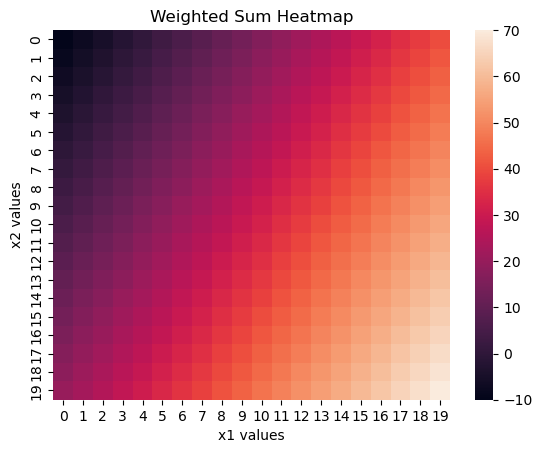

In [4]:
"""

    to visualize the values of the weighted sum in the future space, we use Seaborn's heatmap function to plot the values of the weighted sum

"""

# import libraries
import seaborn as sb
import matplotlib.pyplot as plt

# reshaping the vector
v_reshape = v.reshape(20, 20)

# plotting the heatmap
sb.heatmap(v_reshape)
plt.title("Weighted Sum Heatmap")
plt.xlabel("x1 values")
plt.ylabel("x2 values")
plt.show()


In [5]:
"""
    the vector v has continuous values. We can convert the continuous values to categorical using a threshold. Whenever a value <= 0, the label
    should be 0. When the value is > 0, the label should be 1. We now create a vector of categorical labels y_hat.

"""

# binary masking
y_hat = np.zeros_like(v_reshape, dtype=int)
y_hat[v_reshape > 0] = 1

print(y_hat)

[[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


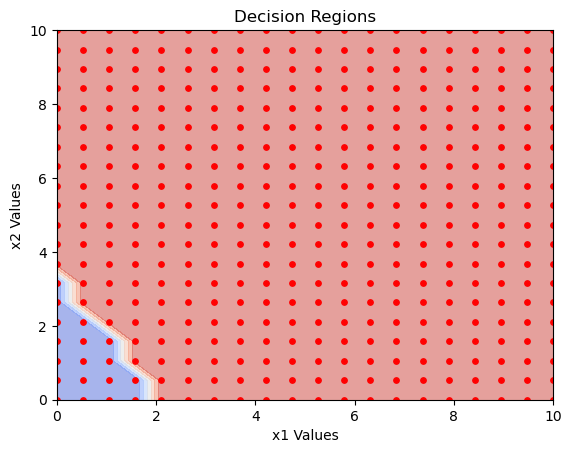

In [6]:
"""

    next, we use matplotlib function to create a contour plot from the binary values y_hat.

"""

y_hat.reshape(20,20)

plt.contourf(x1_grid, x2_grid, y_hat, alpha=0.5, cmap='coolwarm')
plt.scatter(X[:,0],X[:,1], c="red", s=15)
plt.title('Decision Regions')
plt.xlabel("x1 Values")
plt.ylabel("x2 Values")

plt.show()

## Problem Set 2: Geometric Interpretation of Linear Decision Boundaries

In this problem set, we explore how points, vectors and planes can be used to model linear decision boundaries in 2D and 3D spaces. We write plane equations from normal vectors and points, visualize them and use dot prodicts to determine which side of a plane points lie on.


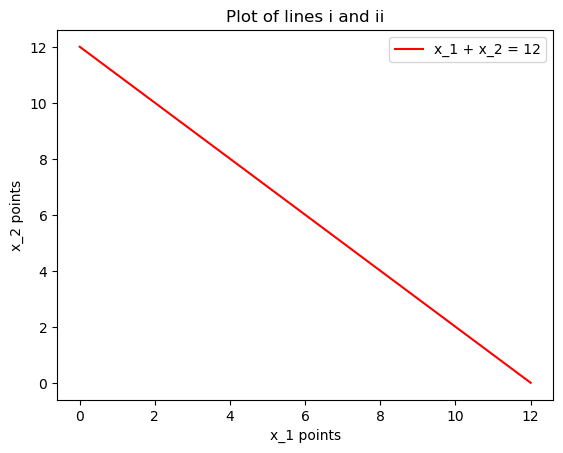

In [7]:

"""

    write the equations for each plane with normal vector n and intersecting point r_0:
    i) n = (1,1), r_0 = (5, 7)
    ii) n = (-1, -1), r_0 = (5, 7)
    iii) n = (1, 1, 0), r_0 = (1, 2, 3)
    aiv) explain why it's not possible to find the plane from the following: n = (1, 3, 5, 11), r_0 = (13, 17)
    av) simplify the equations from i to ii as much as possible. What do you notice about the pairs i and ii?
    avi) plot the normal vectors, points and planes from i to iii

"""


# part 1: n = (1,1), r_0 = (5, 7)
# final answer: x_1 + x_2 = 12

# part 2: n = (-1, -1), r_0 = (5, 7)
# final answer: x_1 + x_2 = 12

# part 3: n = (1, 1, 0), r_0 = (1, 2, 3)
# final answer: x_1 + x_2 = 3

# part 4: n = (1, 3, 5, 11), r_0 = (13, 17)
# final answer: not possible because normal vector is 4 dimensional but the point is 2 dimensional

# part 5: simplify the equations from i and ii
# final answer: when simplified, both have equations of form x_1 + x_2 = 12 because flipping the normal vector changes the orientation of the
#               normal, but doesn't change the plane/line


# part 6: plot the normal vectors, points and planes from i to iii

# plotting i and ii
x_i1 = np.linspace(0, 12, 100)
x_i2 = 12 - x_i1

x_ii1 = np.linspace(0, 12, 100)
x_ii2 = 3 - x_ii1

plt.plot(x_i1, x_i2, label="x_1 + x_2 = 12", color='red')
plt.title("Plot of lines i and ii")
plt.xlabel("x_1 points")
plt.ylabel("x_2 points")
plt.legend()
plt.show()


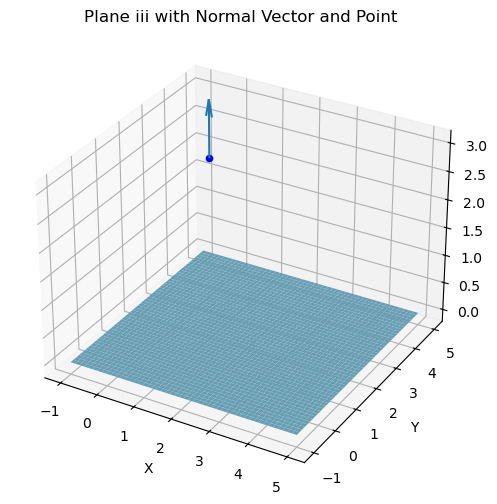

In [8]:

"""
    avi) plot the normal vectors, points and planes from i to iii

"""


from mpl_toolkits.mplot3d import Axes3D

# plotting iii
x = np.linspace(-1, 5, 50)
y = np.linspace(-1, 5, 50)

# ! need to understand how mesh grid works
X, Y = np.meshgrid(x, y)

# creates a 2D array of zeros with the same shape as X
Z = np.zeros_like(X)

# building a new figure
fig = plt.figure(figsize=(8,6))   
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='skyblue')

# plot the r_0
ax.scatter(1, 2, 3, color='blue')

# plot the normal vector
ax.quiver(1, 2, 3, 0, 0, 1)

# setting the plotting labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plane iii with Normal Vector and Point')
plt.show()

In [ ]:

"""

    planes divide in half, we can use the sign of a dot product operation to determine which side of the plane a point lies

    i) calculate the sign for each of the given points
    ii) plot the line, normal vector and points
    iii) verify that for all points that lie on the same side of the normal vector, the dot product is positive

    (2, 2) . (x1 - 5, x2 - 5) = 0

    values:
        2, 15
        3, 17
        4, 13
        4, 1
        5, 3
        6, 2

"""


# d = 2(x1 - 5) + 2(x2 - 5)
    # d > 0 (right side), d < 0 (left side), d = 0 (on the line)


# defining n and r0
n = np.array([2, 2])
r0 = np.array([5, 5])

points = np.array([[2, 15], 
                  [3, 17], 
                  [4, 13],
                  [4, 1], 
                  [5, 3], 
                  [6, 2]])

# looping through all the points
for point in points:

    vector = point - r0
    d = np.dot(n, vector)

    if d > 0:
        print("Right Side")
    if d < 0:
        print("Left Side")
    if d == 0:
        print("On The Line")

Right Side
Right Side
Right Side
Left Side
Left Side
Left Side


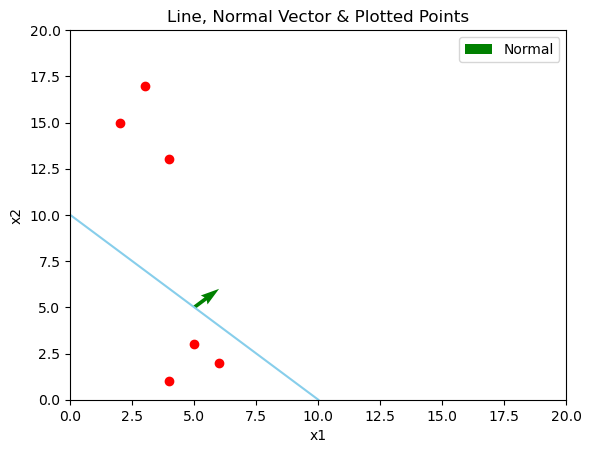

In [13]:

"""

    planes divide in half, we can use the sign of a dot product operation to determine which side of the plane a point lies

    i) calculate the sign for each of the given points
    ii) plot the line, normal vector and points
    iii) verify that for all points that lie on the same side of the normal vector, the dot product is positive

    (2, 2) . (x1 - 5, x2 - 5) = 0

    values:
        2, 15
        3, 17
        4, 13
        4, 1
        5, 3
        6, 2

"""

# plotting equation

x1 = np.linspace(0, 10, 100)
x2 = 5 + 5 - x1
plt.plot(x1, x2, color='skyblue')

# plotting the points
for point in points:
    plt.scatter(point[0], point[1], color="red")


# normal vector
plt.quiver(r0[0], r0[1], n[0], n[1], angles='xy', scale_units='xy', scale=1, color='green', label='Normal')

# plot titles and labels
plt.title('Line, Normal Vector & Plotted Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

# final verdict: plotting seems about right

